Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9226 - loss: 0.2781 - val_accuracy: 0.9687 - val_loss: 0.1057
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9706 - loss: 0.0979 - val_accuracy: 0.9737 - val_loss: 0.0838
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.9800 - loss: 0.0649 - val_accuracy: 0.9772 - val_loss: 0.0834
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9787 - val_loss: 0.0786
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9785 - val_loss: 0.0748
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9787 - val_loss: 0.0751
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9765 - val_loss: 0.0817
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9828 - val_loss: 0.0685
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9931 - loss: 0.0198 - val_accuracy: 0.9792 - val_loss: 0.0777


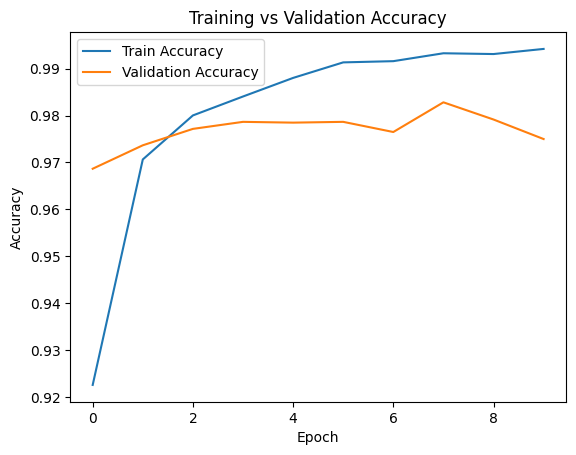

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model with Layer Normalization
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256),
    layers.LayerNormalization(),
    layers.Activation('relu'),

    layers.Dense(128),
    layers.LayerNormalization(),
    layers.Activation('relu'),

    layers.Dense(64),
    layers.LayerNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
